In [1]:
%pylab inline
import tables as tb
import random
import numpy as np

h5 = tb.open_file('E:/xdata/X.h5')

dataset = h5.root.fashion_mnist

X_test = dataset.testX[:]
y_test = dataset.testY[:]

X_test.shape

Populating the interactive namespace from numpy and matplotlib


(10000, 28, 28)

In [2]:
def data_iter(batch_size, features, labels, trainable=True):
    num_examples = len(features)
    indices = np.arange(num_examples)
    if trainable:
        random.shuffle(indices)  # 样本的读取顺序是随机的。
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])      
        yield features.take(j, axis=0), labels.take(j, axis=0)  # take 函数根据索引返回对应元素。

In [3]:
from IPython import display


def use_svg_display():
    # 用矢量图显示。
    display.set_matplotlib_formats('svg')


def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    use_svg_display()
    # 这里的 _ 表示我们忽略（不使用）的变量。
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img)
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

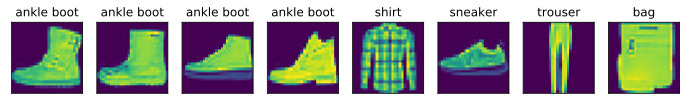

In [4]:
for x, y in data_iter(8, X_test, y_test):
    pass

show_fashion_mnist(x, get_fashion_mnist_labels(y))